<a href="https://colab.research.google.com/github/jmyoo3737-wq/Python-club-analysis-2025/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
file_path = ('/content/drive/MyDrive/VCCRI_Python_Club_2025/data/pneumonia_recovery_dataset.csv')

In [5]:
df=pd.read_csv(file_path)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(file_path)

In [8]:
df.rename(columns={'patient_id':'subject_id'}, inplace=True)
df.drop_duplicates(inplace=True)
median_bmi = df['bmi'].median()

In [9]:
df['bmi']= df['bmi'].fillna(median_bmi)

In [10]:
df['sex'] = df['sex'].str.capitalize()
df['age'] = pd.to_numeric(df['age'])
df.head()

,subject_id,age,sex,bmi,blood_pressure_systolic,hemoglobin_level,c_reactive_protein,treatment_group,days_to_recovery
0,P001,68,Male,29.3,145,13.1,120,A,14
1,P002,75,Female,24.1,160,11.9,155,B,18
2,P003,52,Male,33.5,130,15.2,80,A,10
3,P004,61,Female,21.9,135,12.5,110,B,12
4,P005,79,Male,26.8,155,11.5,200,B,21


In [11]:
mini_data={'Category':['A','B','A','B', 'B'],
           'Value':[60,50,70,80,90]}
mini_df =pd.DataFrame(mini_data)

In [12]:
grouped_object = mini_df.groupby('Category')
print(grouped_object)

In [13]:
group_a = grouped_object.get_group('A')
print(group_a)

  Category  Value
0        A     60
2        A     70


In [14]:
group_b=grouped_object.get_group('B')

In [15]:
print(group_b)

  Category  Value
1        B     50
3        B     80
4        B     90


In [16]:
grouped_mean = mini_df.groupby('Category')['Value'].mean()
print(grouped_mean)

Category
A    65.000000
B    73.333333
Name: Value, dtype: float64


In [17]:
mini_df.groupby('Category')['Value'].agg(['mean','sum','count'])

,mean,sum,count
Category,,,
A,65.000000,130,2
B,73.333333,220,3


In [18]:
mini_df['sex'] = ['M','F', 'F', 'M','M']

In [19]:
mini_df.head()

,Category,Value,sex
0,A,60,M
1,B,50,F
2,A,70,F
3,B,80,M
4,B,90,M


In [20]:
mini_df.groupby(['Category','sex'])['Value'].mean()

Category  sex
A         F      70.0
          M      60.0
B         F      50.0
          M      85.0
Name: Value, dtype: float64

In [21]:
mini_df.groupby(['Category','sex'])['Value'].agg(['mean','sum','count'])

mean  sum  count
Category sex                  
A        F    70.0   70      1
         M    60.0   60      1
B        F    50.0   50      1
         M    85.0  170      2

In [22]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

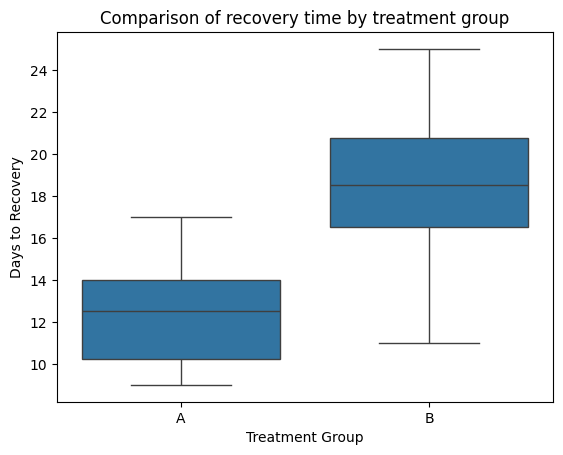

In [23]:
sns.boxplot(data=df, x='treatment_group', y='days_to_recovery')
plt.title('Comparison of recovery time by treatment group')
plt.xlabel('Treatment Group')
plt.ylabel('Days to Recovery')
plt.show()

In [24]:
df.groupby('treatment_group')['days_to_recovery'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment_group,,,,,,,,
A,10.0,12.5,2.549510,9.0,10.25,12.5,14.00,17.0
B,10.0,18.3,4.423423,11.0,16.50,18.5,20.75,25.0


In [25]:
df.groupby(['treatment_group','sex'])['days_to_recovery'].mean()

treatment_group  sex   
A                Female    10.500
                 Male      13.000
B                Female    17.125
                 Male      23.000
Name: days_to_recovery, dtype: float64

In [26]:
!pip install statannotations

A vs. B: t-test independent samples, P_val:2.082e-03 t=-3.592e+00


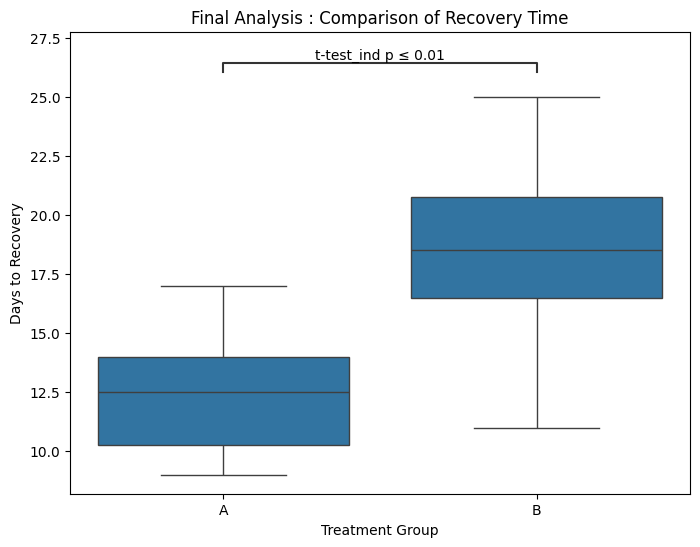

In [27]:
from statannotations.Annotator import Annotator
plt.figure(figsize=(8,6))
ax=sns.boxplot(data=df, x='treatment_group',y='days_to_recovery')
plt.title('Final Analysis : Comparison of Recovery Time')
plt.xlabel('Treatment Group')
plt.ylabel('Days to Recovery')
box_pairs = [("A","B")]
annotator = Annotator(ax, box_pairs, data=df, x='treatment_group',y='days_to_recovery')
annotator.configure(test='t-test_ind',text_format='simple', loc='inside')
annotator.apply_and_annotate()
plt.show()

In [28]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 9.4 MB/s eta 0:00:00


In [29]:
import docx
from docx.shared import Inches
from scipy.stats import ttest_ind
from statannotations.Annotator import Annotator

group_a=df[df['treatment_group']=='A']['days_to_recovery']
group_a
group_b=df [df['treatment_group']=='B']['days_to_recovery']

In [30]:
t_stat,p_val=ttest_ind(group_a,group_b)
p_val

np.float64(0.002082080165002606)

In [31]:
if p_val < 0.001 :
  p_text = 'p<0.001'
else:
  p_text=f"p={p_val:.4f}"
  print(p_text)

p=0.0021


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
ax=sns.boxplot(data=df, x='treatment_group', y='days_to_recovery')
plt.title("Comparison of Recovery Time ")
plt.xlabel('Treatment Gorup')
plt.ylabel('Days to Reocovery')
box_pairs = [("A","B")]
annotator = Annotator(ax, box_pairs, data=df, x='treatment_group',y='days_to_recovery')
annotator.configure(test='t-test_ind',text_format='simple', loc='inside')
annotator.apply_and_annotate()
plt.savefig('annotated_plot.png')
plt.close()
doc=docx.Document()
doc.add_heading('Pneumonia Recovery Study:Final Report',0)
doc.add_heading('Results',level=1)
doc.add_paragraph(
    f"A statistically significant differences in recovery time was"
    f"observed between the two treatment groups. Patients in the"
    f"experimental group(A) recovered significantly faster than"
    f"those in the standard group(B) , as determined by"
    f"independent t-test ({p_text})"

)
doc.add_picture('annotated_plot.png', width=Inches(6.0))
doc.save('Final_Report_Dynamic.docx')

A vs. B: t-test independent samples, P_val:2.082e-03 t=-3.592e+00


In [34]:
print(df.head())

  subject_id  age     sex   bmi  blood_pressure_systolic  hemoglobin_level  \
0       P001   68    Male  29.3                      145              13.1   
1       P002   75  Female  24.1                      160              11.9   
2       P003   52    Male  33.5                      130              15.2   
3       P004   61  Female  21.9                      135              12.5   
4       P005   79    Male  26.8                      155              11.5   

   c_reactive_protein treatment_group  days_to_recovery  
0                 120               A                14  
1                 155               B                18  
2                  80               A                10  
3                 110               B                12  
4                 200               B                21  
